## Hierarchical Clustring - TASK 49

Hemant Thapa

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

### IMPORT DATASET

In [2]:
df = pd.read_csv('Iris.csv')
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id', axis=1, inplace=True)

In [4]:
df[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [6]:
#Selecting two features
X = df[['sepallengthcm','petallengthcm']]
X[:5]

,sepallengthcm,petallengthcm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [7]:
X = df[['sepallengthcm','petallengthcm']].values.reshape(-1,2)
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [8]:
print('Data Size:')
print(X.shape)

Data Size:
(150, 2)


In [9]:
#Selecting K
K = 3

### CLUSTRING

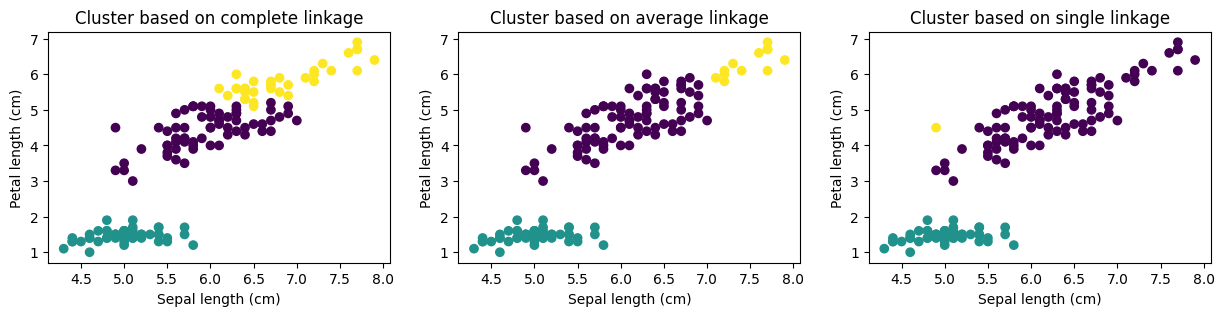

In [10]:
# Print dendrogram for different linkage methods and distance metrics
plt.figure(figsize=[15,3])

linkage_types = ['complete', 'average', 'single']

for i, linkage in enumerate(linkage_types):
    plt.subplot(1,3, i+1)
    
    cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=linkage)
    cluster.fit_predict(X)
    
    ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
    
    plt.title('Cluster based on {} linkage'.format(linkage))
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Petal length (cm)')

### VISUALISATION

In [12]:
# Scale the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(X)

The StandardScaler class from scikit-learn's preprocessing module is used to perform feature scaling on the data. The fit_transform method is used to fit the data to the scaler and then transform the data to obtain the scaled data, which is stored in the iris_scaled variable.

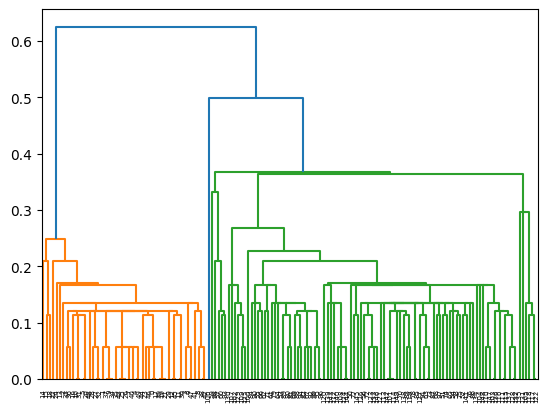

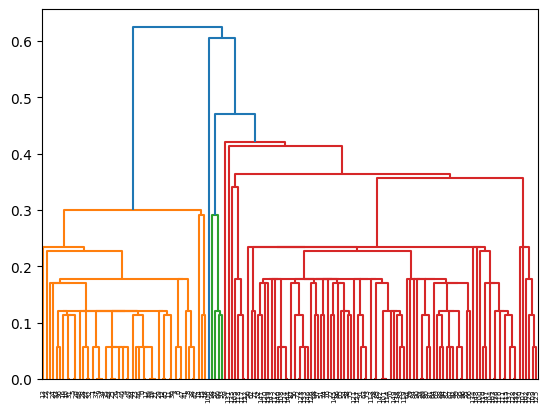

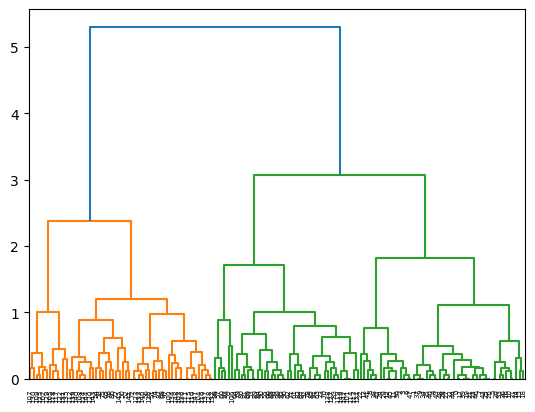

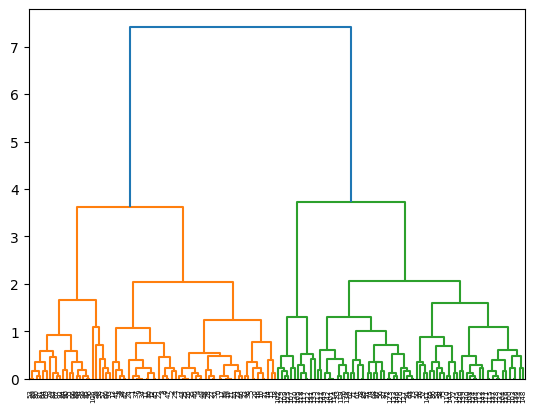

In [13]:
# Loop through the linkage methods
for linkage_method in ['single', 'complete']:
    
    # Loop through the distance metrics
    for distance_metric in ['euclidean', 'cityblock']:
        
        # Perform linkage
        Z = sch.linkage(iris_scaled, method=linkage_method, metric=distance_metric)
        
        # Create a new figure
        plt.figure()
        
        # Plot the dendrogram
        sch.dendrogram(Z)
        
        # Add a title to the plot indicating the linkage method and distance metric
        plt.show()


In [74]:
# Choose a dendrogram and extract number of clusters
# Here we choose single linkage with euclidean distance
Z = sch.linkage(iris_scaled, method='single', metric='euclidean')
n_clusters = 2 # choose number of clusters based on the dendrogram

In [75]:
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='single', affinity='euclidean')
agg_cluster.fit(iris_scaled)
labels = agg_cluster.labels_

In [76]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### SILHOUETTE SCORE

In [77]:
# Verify clusters using silhouette score
sil_score = silhouette_score(iris_scaled, labels)
print(f'Silhouette score: {sil_score}')

Silhouette score: 0.6174310867632291


### CLUSTRING SOLUTION

In [78]:
# Comment on confidence in clustering solution
if sil_score > 0.5:
    print("The clustering solution is quite good")
else:
    print("The clustering solution is not very good")

The clustering solution is quite good


In [83]:
# Perform clustering with chosen linkage method
cluster = AgglomerativeClustering(n_clusters=K, affinity='euclidean', linkage=linkage)
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

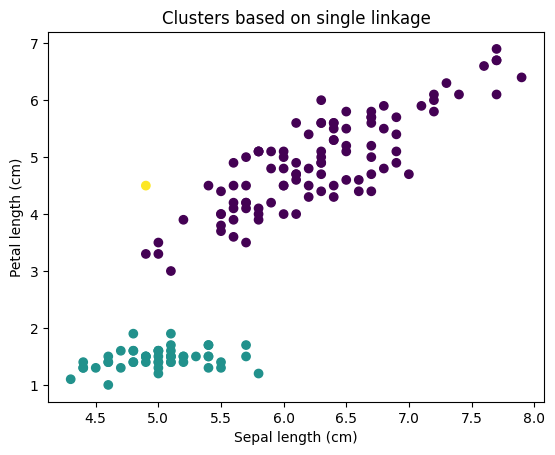

In [92]:
# Plot the clusters with different colors
ax = plt.scatter(X[:,0], X[:,1], c=cluster_labels)

# Add title and axis labels to the plot
plt.title('Clusters based on {} linkage'.format(linkage))
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

plt.show()